In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

df2=df.head (100)

edades=df['edad']
numPa=df['idpaciente']
presion=df['presiónreposo']
colesterolSuero=df['colesterolsuero']
glucemiaEnAyunas=df['glucemiaayunas']
electrocardiogramaReposo=df['electrocardiogramareposo']
frecuenMaxCardi=df['frecuenciamáximacardíaca']

edad minima, maxima y promedio de pacientes

In [2]:
EdProm=round(edades.mean(), 2)
EdMax=edades.max()
EdMin=edades.min()
EdModa=edades.mode()[0]
EdMedian=edades.median()

print ("el promedio redondeado de edades de entre todos los pacientes es: ",EdProm)
print ("la edad minima de edades de entre todos los pacientes es: ",EdMin)
print ("la edad máxima de edades de entre todos los pacientes es: ",EdMax)
print ("la edad mediana de edades de entre todos los pacientes es: ",EdMedian)
print ("la edad moda de edades de entre todos los pacientes es: ",EdModa)

el promedio redondeado de edades de entre todos los pacientes es:  49.24
la edad minima de edades de entre todos los pacientes es:  20
la edad máxima de edades de entre todos los pacientes es:  80
la edad mediana de edades de entre todos los pacientes es:  49.0
la edad moda de edades de entre todos los pacientes es:  20


Cantidad por género dependiendo 0 es mujer y 1 es hombre

In [3]:
contGen = df['género'].value_counts()
porGen = df['género'].value_counts(normalize=True) * 100

# Mostrar resultados
print(f"Mujeres (0): {contGen[0]} ({porGen[0]:.2f}%)")
print(f"Hombres (1): {contGen[1]} ({porGen[1]:.2f}%)")


Mujeres (0): 235 (23.50%)
Hombres (1): 765 (76.50%)


Dolor en el pecho, significando Típico anginoso (0), Angina atípica (1), dolor no anginoso (2), asintómatico (3)

In [4]:
contDolor = df['dolorenelpecho'].value_counts()
porDolor = df['dolorenelpecho'].value_counts(normalize=True) * 100

# Mostrar resultados
print(f"Típico anginoso (0): {contDolor[0]} ({porDolor[0]:.2f}%)")
print(f"Angina atípica (1): {contDolor[1]} ({porDolor[1]:.2f}%)")
print(f"dolor no anginoso (2): {contDolor[2]} ({porDolor[2]:.2f}%)")
print(f"asintómatico (3): {contDolor[3]} ({porDolor[3]:.2f}%)")

Típico anginoso (0): 420 (42.00%)
Angina atípica (1): 224 (22.40%)
dolor no anginoso (2): 312 (31.20%)
asintómatico (3): 44 (4.40%)


Presion en reposo, minimo , medio y extremo

In [5]:
PreRepProm=round(presion.mean(), 2)
PreRepMax=presion.max()
PreRepMin=presion.min()

print ("el promedio redondeado de presión en reposo de entre todos los pacientes es: ",PreRepProm)
print ("la presión en reposo minima de entre todos los pacientes es: ",PreRepMin)
print ("la presión en reposo máxima/extrema de entre todos los pacientes es: ",PreRepMax)

el promedio redondeado de presión en reposo de entre todos los pacientes es:  151.75
la presión en reposo minima de entre todos los pacientes es:  94
la presión en reposo máxima/extrema de entre todos los pacientes es:  200


Glucemia en ayunas significando 1 mayor a 120 mg/dL y 0 menor o igual a 120 mg/dL.

In [6]:
contGluce = df['glucemiaayunas'].value_counts()
porGluce = df['glucemiaayunas'].value_counts(normalize=True) * 100

# Mostrar resultados
print(f"Menor o igual a 120 mg/dL (0): {contGluce[0]} ({porGluce[0]:.2f}%)")
print(f"Mayor a 120 mg/dL(1): {contGluce[1]} ({porGluce[1]:.2f}%)")

Menor o igual a 120 mg/dL (0): 704 (70.40%)
Mayor a 120 mg/dL(1): 296 (29.60%)


Diagnostico final, significando 0 libre de enfermedad cardíaca y 1 con enfermedad cardíaca

In [7]:
contDiag = df['diagnóstico'].value_counts()
porDiag = df['diagnóstico'].value_counts(normalize=True) * 100

# Mostrar resultados
print(f"Sin enfermedad cardíaca (0): {contDiag[0]} ({porDiag[0]:.2f}%)")
print(f"Indíca enfermedad cardíaca (1): {contDiag[1]} ({porDiag[1]:.2f}%)")

Sin enfermedad cardíaca (0): 420 (42.00%)
Indíca enfermedad cardíaca (1): 580 (58.00%)




---



#***Gráficos de los pacientes***

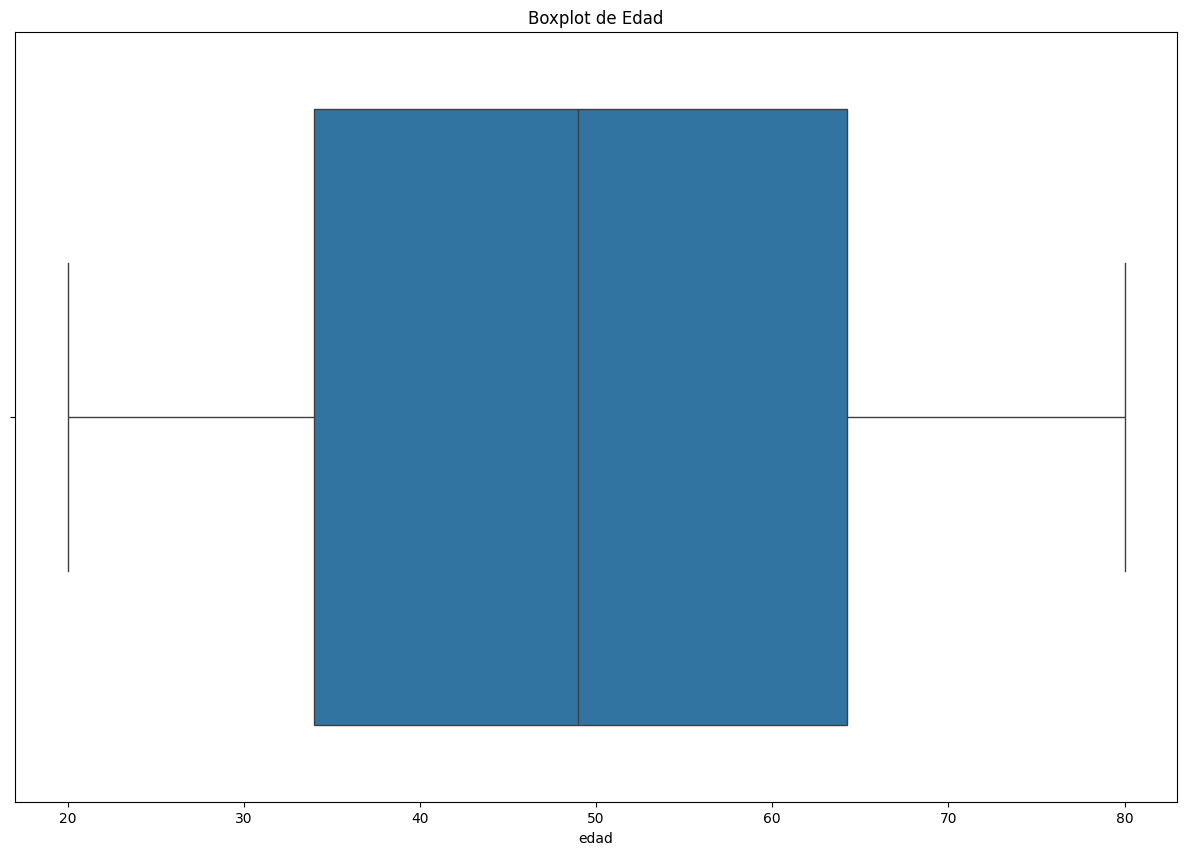

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['edad'])
plt.title('Boxplot de Edad')
plt.show()

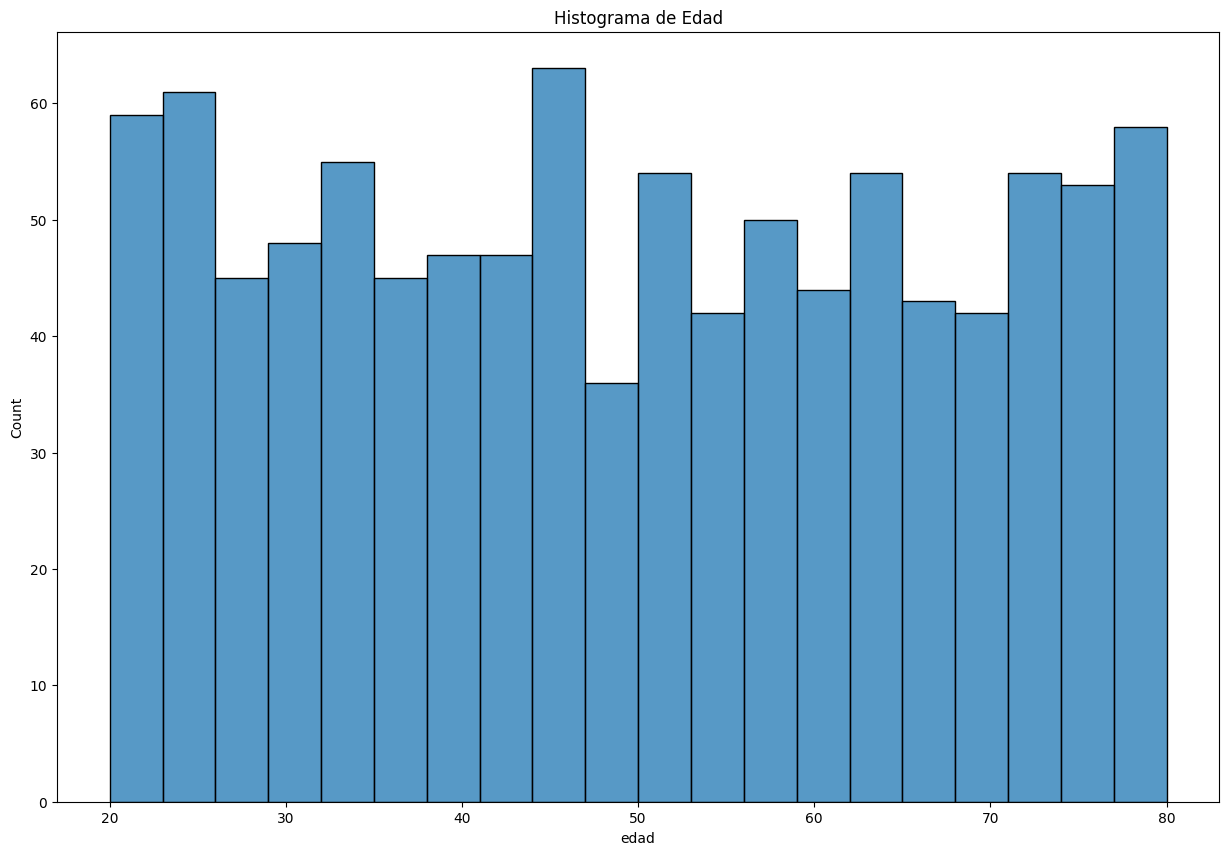

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(df['edad'], bins=20, kde=False)
plt.title('Histograma de Edad')
plt.show()

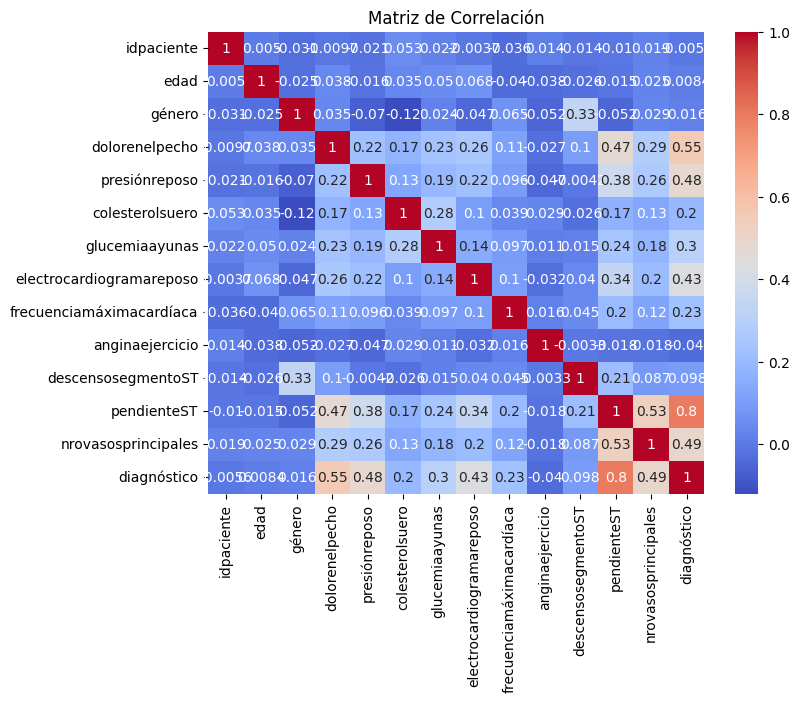

In [10]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

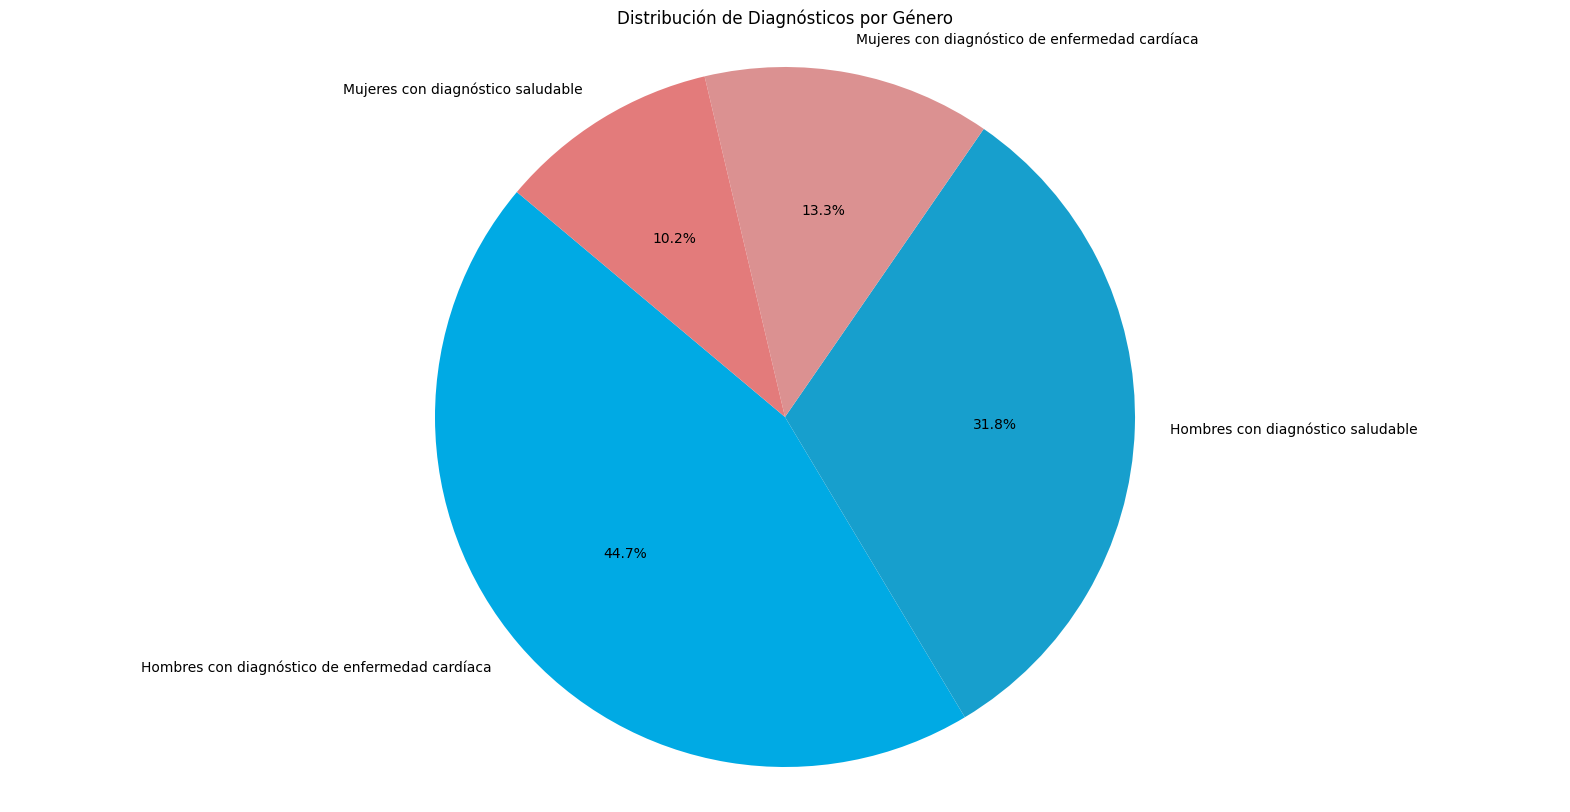

In [11]:
import matplotlib.pyplot as plt
df['género_diagnóstico'] = df['género'].astype(str) + '-' + df['diagnóstico'].astype(str)
cont_genero_diagnostico = df['género_diagnóstico'].value_counts()
etiquetas = {
    '0-0': 'Mujeres con diagnóstico saludable',
    '0-1': 'Mujeres con diagnóstico de enfermedad cardíaca',
    '1-0': 'Hombres con diagnóstico saludable',
    '1-1': 'Hombres con diagnóstico de enfermedad cardíaca'
}
cont_genero_diagnostico = cont_genero_diagnostico.rename(index=etiquetas)
plt.figure(figsize=(20, 10))
plt.pie(cont_genero_diagnostico, labels=cont_genero_diagnostico.index, autopct='%1.1f%%', startangle=140, colors=['#00aae4', '#179fcd', '#db9191', '#e37b7b'])
plt.title('Distribución de Diagnósticos por Género')
plt.axis('equal')
plt.show()

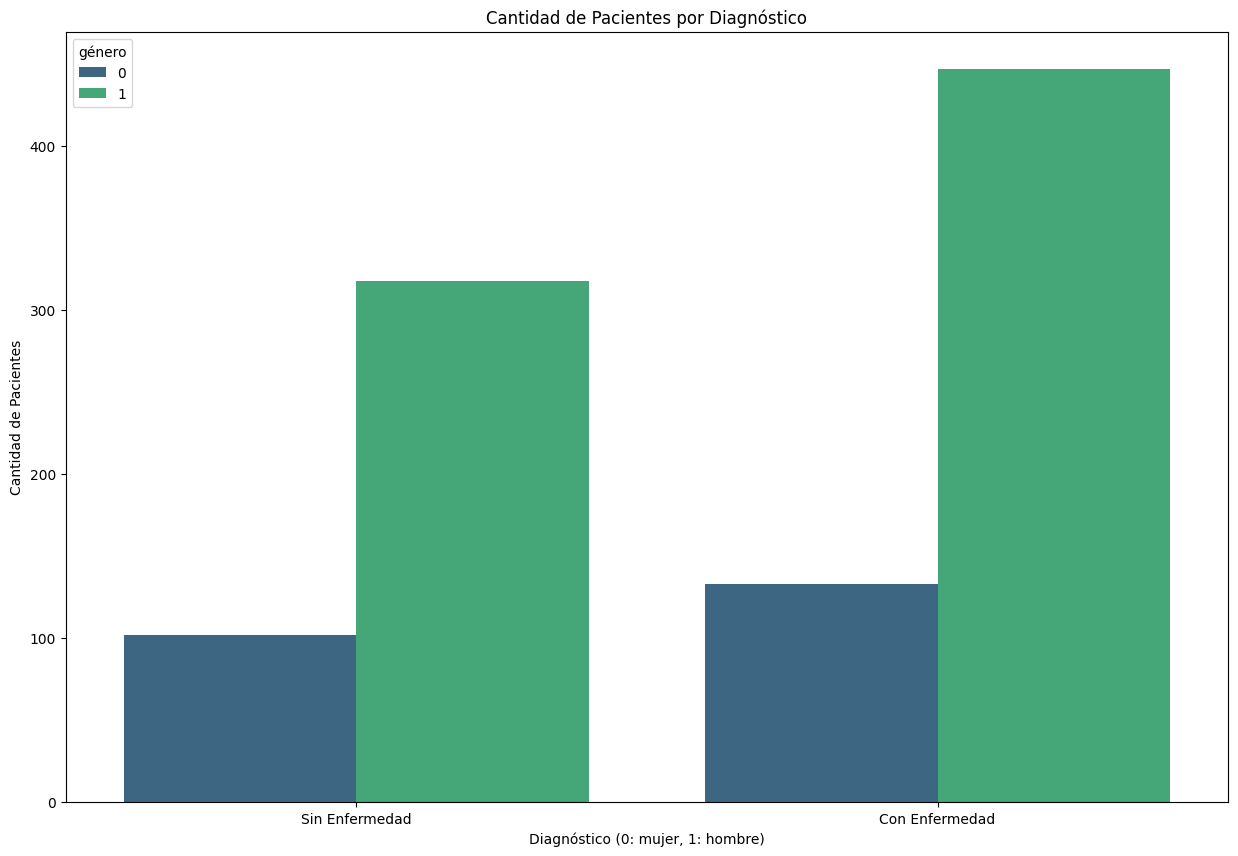

In [12]:
# gráfico de columnas para la cantidad de pacientes por diagnóstico
plt.figure(figsize=(15, 10))
sns.countplot(x='diagnóstico', data=df, palette='viridis', hue='género')

plt.title('Cantidad de Pacientes por Diagnóstico')
plt.xlabel('Diagnóstico (0: mujer, 1: hombre)')
plt.ylabel('Cantidad de Pacientes')

plt.xticks([0, 1], ['Sin Enfermedad', 'Con Enfermedad'])

plt.show()

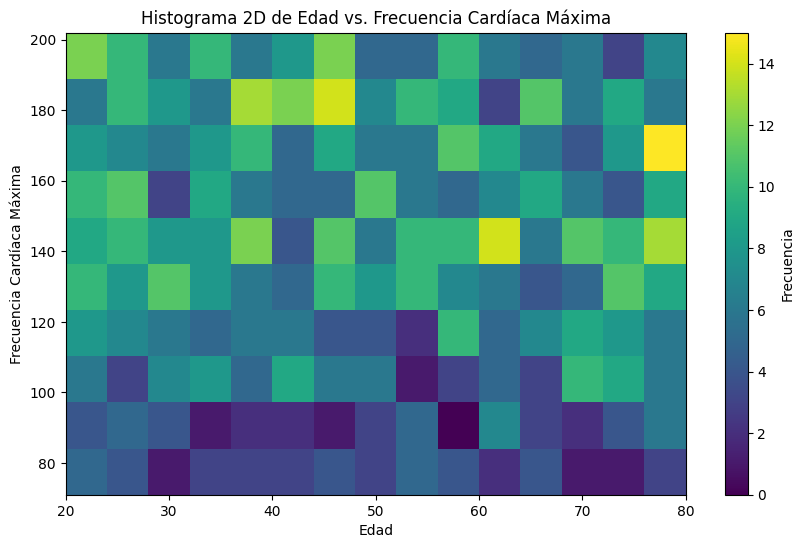

In [13]:
# entre 40 años, hay más presentando 180 de frecuencia
# el grupo de personas con mayor frecuencia está entre los 20 años

plt.figure(figsize=(10, 6))
plt.hist2d(df['edad'], df['frecuenciamáximacardíaca'], bins=(15, 10), cmap='viridis')
plt.colorbar(label='Frecuencia')

plt.title('Histograma 2D de Edad vs. Frecuencia Cardíaca Máxima')
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardíaca Máxima')

plt.show()

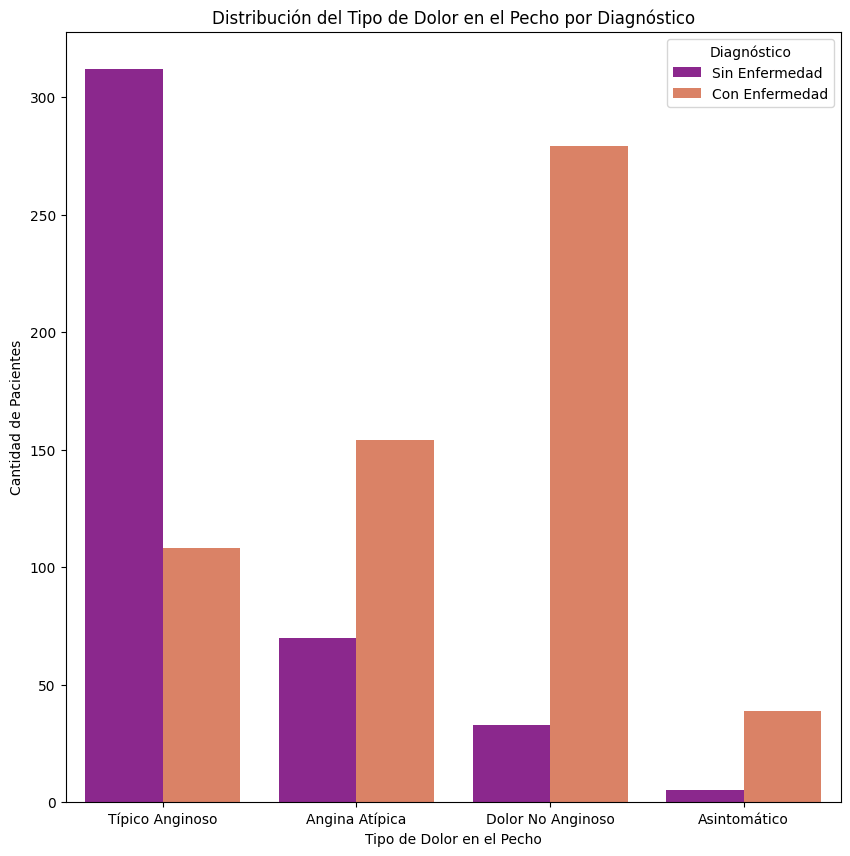

In [14]:
# Relación entre Dolor en el Pecho y Diagnóstico
plt.figure(figsize=(10, 10))
sns.countplot(x='dolorenelpecho', hue='diagnóstico', data=df, palette='plasma')

plt.title('Distribución del Tipo de Dolor en el Pecho por Diagnóstico')
plt.xlabel('Tipo de Dolor en el Pecho')
plt.ylabel('Cantidad de Pacientes')
plt.xticks([0, 1, 2, 3], ['Típico Anginoso', 'Angina Atípica', 'Dolor No Anginoso', 'Asintomático'])
plt.legend(title='Diagnóstico', labels=['Sin Enfermedad', 'Con Enfermedad'])

plt.show()

# ***Entrenamiento del Modelos***

In [15]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Variables
x = df[['pendienteST']]  # Variable independiente (debe ser DataFrame)
y = df['diagnóstico']  # Variable dependiente

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [31]:
# Predicciones
pendienteST = "2" # @param ["0","1","2","3"]
enfermedad_diag = pd.DataFrame({"pendienteST": [pendienteST]})
resultado = modelo.predict(enfermedad_diag)
res = round(resultado[0],3)

if (res*100) < 45:
    riesgo = "Baja probabilidad"
elif (res*100) < 80:
    riesgo = "Probabilidad media"
else:
    riesgo = "Alta probabilidad"

print("="*40)
print(f"{'PREDICCIÓN DE ENFERMEDAD CARDIOVASCULAR':^40}")
print("="*40)
print(f"{'Pendiente ST':<20} | {pendienteST}")
print(f"{'Probabilidad (%)':<20} | {(res*100):.2f}%")
print(f"{'Riesgo':<20} | {riesgo}")
print("="*40)



PREDICCIÓN DE ENFERMEDAD CARDIOVASCULAR 
Pendiente ST         | 2
Probabilidad (%)     | 76.00%
Riesgo               | Probabilidad media


Coeficiente: 0.39
Intersección: -0.02


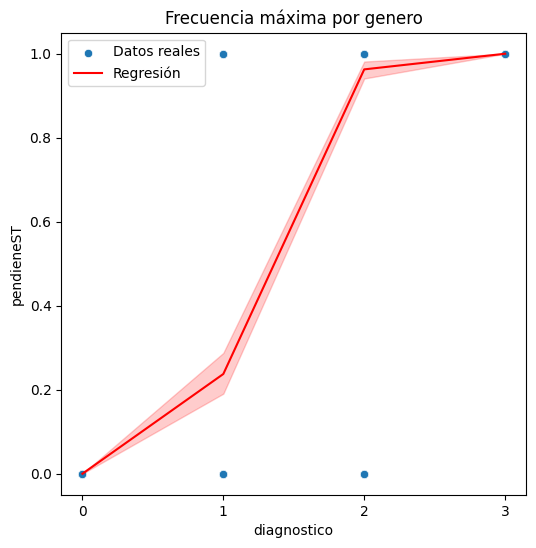

In [17]:


# Mostrar coeficientes
print(f"Coeficiente: {modelo.coef_[0]:.2f}")
print(f"Intersección: {modelo.intercept_:.2f}")

# Graficar
plt.figure(figsize=(6,6))
sns.scatterplot(x='pendienteST', y='diagnóstico', data=df, label='Datos reales')
sns.lineplot(x='pendienteST', y='diagnóstico', data=df, color='red', label='Regresión')
plt.xticks([0, 1, 2, 3])
plt.title('Frecuencia máxima por genero')
plt.xlabel('diagnostico')
plt.ylabel('pendieneST')
plt.legend()
plt.show()